In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix 

In [3]:
df = pd.read_csv("D:/car_data.csv")
print("no. of rows = ", df.shape[0],"\nno. of columns = ", df.shape[1])
df.head()

no. of rows =  1000 
no. of columns =  5


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [38]:
# Creating Gender_male and Gender_female columns
df['Gender_male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Gender_female'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df.tail()

,User ID,Gender,Age,AnnualSalary,Purchased,Gender_male,Gender_female
995,863,Male,38,59000,0,1,0
996,800,Female,47,23500,0,0,1
997,407,Female,28,138500,1,0,1
998,299,Female,48,134000,1,0,1
999,687,Female,44,73500,0,0,1


In [39]:
df1 = df.iloc[:, 2:]
df1.head(2)

,Age,AnnualSalary,Purchased,Gender_male,Gender_female
0,35,20000,0,1,0
1,40,43500,0,1,0


In [25]:
X = df1.drop('Purchased', axis = 1)  #Using "Gender_male", "Gender_female", "Age", "AnnualSalary" 
Y = df1['Purchased']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

In [26]:
print(X_train.shape, Y_train.shape)   # Should match in row count

(700, 4) (700,)


In [27]:
# Standardizing the features for LDA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Building the LDA model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_scaled, Y_train)

# Predict on test data for whether Car Purchasing or not 
LDA_pred = LDA.predict(X_test_scaled)

In [29]:
# Adding the predictions to the test set as a new column 'pred_Purchased'
Y_test = Y_test.reset_index(drop=True)
Y_test = pd.DataFrame(Y_test)
Y_test['pred_Purchased'] = LDA_pred
Y_test.head()

,Purchased,pred_Purchased
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0


In [30]:
Y_test.head()

,Purchased,pred_Purchased
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0


In [31]:
# Creating the confusion matrix
cm = pd.crosstab(Y_test['Purchased'], Y_test['pred_Purchased'])
cm

pred_Purchased,0,1
Purchased,,
0,182,15
1,31,72


             Predicted
           | 0     | 1
    Actual |-------|-------
      0    |  TN   |  FP
      1    |  FN   |  TP


In [32]:
# Extracting TN, FP, FN, TP from the confusion matrix
tn, fp, fn, tp = cm.to_numpy().ravel()   

# The Confusion Matrix(cm) is in Dataframe form then we can'nt directly use "tn, fp, fn, tp = cm.ravel()" this code we can use "numpy" before directly calling ravel to convert the dataframe into array first.

In [33]:
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)

True Positive: 72
True Negative: 182
False Positive: 15
False Negative: 31


In [34]:
# Calculating accuracy manually using the confusion matrix values
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8466666666666667

Final Result: Model Evaluation
# Accuracy: 84.67%

The model correctly predicted purchase status in approximately 84.67% of cases.

Confusion Matrix Breakdown:

True Positive (TP): Correctly predicted customers who made a purchase.

True Negative (TN): Correctly predicted customers who did not make a purchase.

False Positive (FP): Incorrectly predicted purchase when no purchase was made.

False Negative (FN): Incorrectly predicted no purchase when a purchase was made.

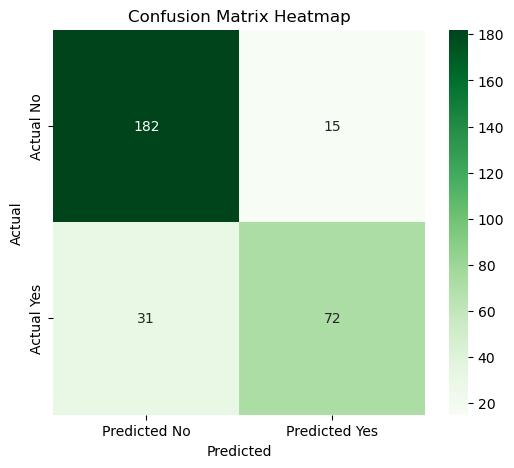

In [35]:
# Confusion matrix values
tp, tn, fp, fn = 72, 182, 15, 31

# Create a confusion matrix array
conf_matrix = np.array([[tn, fp], [fn, tp]])

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])

# Adding titles and labels
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Display the heatmap
plt.show()

In [36]:
# Y_test and LDA_pred are your actual and predicted values
results = pd.DataFrame({'Gender': df["Gender"], 'Age': df["Age"], 'Annual Salary': df["AnnualSalary"], 'Actual Purchased': Y_test["Purchased"], 'Predicted Purchased': Y_test["pred_Purchased"]})

# Print to check
results.head()

,Gender,Age,Annual Salary,Actual Purchased,Predicted Purchased
0,Male,35,20000,1.0,1.0
1,Male,40,43500,0.0,1.0
2,Male,49,74000,0.0,0.0
3,Male,40,107500,1.0,1.0
4,Male,25,79000,0.0,0.0


In [37]:
# Save the DataFrame to a CSV file
results.to_csv('D:/Car_data_predictions.csv', index=False)

print("File saved successfully!")

File saved successfully!
